# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

### Explain the problem:

This dataset contains a large number of images and corresponding fashion/apparel segmentations.
For this step of project we made a dataset which has three columns:

“ImageId” - the unique ID of an image

“SetClassID” - the identified attributes ID’s of the image, such as “shirt, blouse”, “sweater”, etc

“Class” -  1 if identified attributes contain “dress”, else 0.

Thus the binary outcome variable is “Class” - if the identified attributes of the image contain “dress”, then it’s class 1; else class 0.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train.csv')

In [6]:
with open('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/sample_submission.csv')


In [7]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [8]:
df["Ratio"]=df["Height"]/df["Width"]
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317",1.41839
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317",1.41839
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163,1.41839
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204",1.41839
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219,1.41839


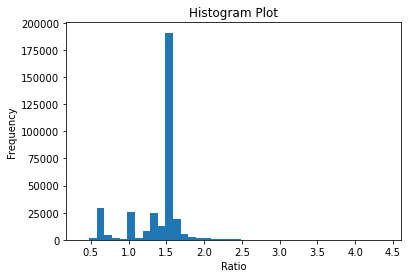

In [9]:
# create the histogram plot
plt.hist(df["Ratio"], bins=40)

# add labels and title
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram Plot')

# show the plot
plt.show()

In [10]:
(df["Ratio"]).mean()

1.3736954977652924

In [11]:
(df["Ratio"]).mode()[0]

1.5

In [12]:
pd.DataFrame((df["Ratio"]).value_counts()).head()

,Ratio
1.500000,78784
1.000000,24422
1.499250,15896
1.333333,12550
0.666667,10521


In [13]:
ratio_df = df.groupby('ImageId')['Ratio'].mean().reset_index()
ratio_df.head()

,ImageId,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,1.418390
1,0000fe7c9191fba733c8a69cfaf962b7,1.000000
2,0002ec21ddb8477e98b2cbb87ea2e269,1.502253
3,0002f5a0ebc162ecfb73e2c91e3b8f62,1.417500
4,0004467156e47b0eb6de4aa6479cbd15,1.500000


In [14]:
image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_78959/700136001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))


In [15]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

In [16]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [17]:
image_df=image_df.merge(ratio_df, on='ImageId')
image_df.head()

,ImageId,SetClassId,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,"[0, 32, 4, 6, 28, 29, 31]",1.418390
1,0000fe7c9191fba733c8a69cfaf962b7,"[33, 1]",1.000000
2,0002ec21ddb8477e98b2cbb87ea2e269,"[33, 10, 23]",1.502253
3,0002f5a0ebc162ecfb73e2c91e3b8f62,"[33, 10, 15]",1.417500
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]",1.500000


In [18]:
image_df = image_df[image_df['Ratio'] == 1.5]
image_df.head()

,ImageId,SetClassId,Ratio
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]",1.5
5,00048c3a2fb9c29340473c4cfc06424a,"[1, 33, 35, 8, 13, 23, 24]",1.5
12,000c9b4926cd78edd4c19cbc6beba111,"[33, 10]",1.5
13,000cd2e13d1bdd28f480304d7bb9e1ca,"[1, 35, 37, 7, 23, 28, 31]",1.5
15,000e18920575a2e59b3a0c38e6546d29,"[33, 36, 10, 15, 23]",1.5


In [19]:
image_df.shape

(9817, 3)

In [20]:
indices = []

# Loop through the rows of the DataFrame
for i in range(len(image_df)):
    if len(image_df.SetClassId.iloc[i]) == 1:
        indices.append(i)
print("Number of images that have only one class:")
print(len(indices))

Number of images that have only one class:
13


So only 13 images have only one class so we couldn't make the data binary with this strategy 

Our next idea would be making data binary by the tags of Dress

In [21]:
# Define the numbers to search for
search_numbers = [10]

# Create a boolean mask indicating which rows contain the specified numbers
mask = image_df['SetClassId'].apply(lambda x: any([num in x for num in search_numbers]))

# Filter the DataFrame based on the mask
filtered_df = image_df[mask]
other_df = image_df[~mask]


In [22]:
filtered_df.shape

(4113, 3)

In [23]:
other_df.shape

(5704, 3)

**************************************************


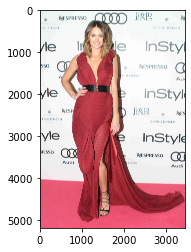

[0] neckline 
[1] buckle 
[2] flower 
[3] dress 
[4] belt 
[5] shoe 
[6] bag, wallet 
**************************************************
**************************************************


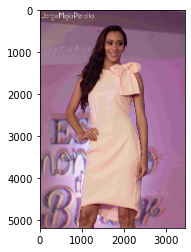

[0] neckline 
[1] dress 
[2] bow 
**************************************************
**************************************************


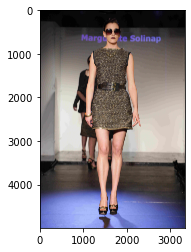

[0] neckline 
[1] buckle 
[2] dress 
[3] glasses 
[4] belt 
[5] shoe 
**************************************************
**************************************************


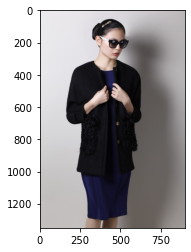

[0] neckline 
[1] coat 
[2] dress 
[3] glasses 
[4] headband, head covering, hair accessory 
[5] sleeve 
**************************************************
**************************************************


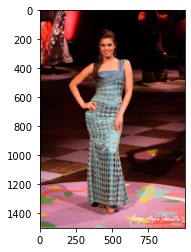

[0] neckline 
[1] dress 
[2] shoe 
**************************************************


In [24]:
for i in range(5):
    x = np.random.randint(0,len(filtered_df),size=(1,))[0]
    ID = filtered_df['ImageId'].iloc[x]
    classes = filtered_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)
    

**************************************************


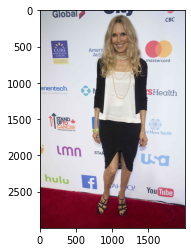

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] cardigan 
[3] skirt 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


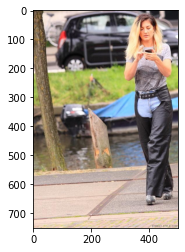

[0] top, t-shirt, sweatshirt 
[1] buckle 
[2] pants 
[3] belt 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


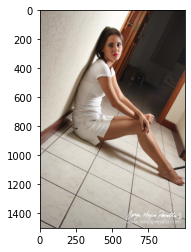

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] skirt 
[3] rivet 
[4] sleeve 
**************************************************
**************************************************


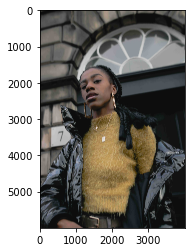

[0] top, t-shirt, sweatshirt 
[1] buckle 
[2] neckline 
[3] jacket 
[4] belt 
[5] collar 
[6] sleeve 
**************************************************
**************************************************


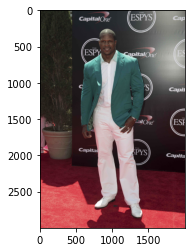

[0] pocket 
[1] shirt, blouse 
[2] jacket 
[3] pants 
[4] watch 
[5] shoe 
[6] collar 
[7] lapel 
[8] sleeve 
**************************************************


In [25]:
for i in range(5):
    x = np.random.randint(0,len(other_df),size=(1,))[0]
    ID = other_df['ImageId'].iloc[x]
    classes = other_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)

# Adding Class Column

Dress = 1 and Non-Dress = 0

In [26]:
filtered_df["Class"]=1
other_df["Class"]=0

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_78959/4009865848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Class"]=1
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_78959/4009865848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df["Class"]=0


Choose a Sample of 8,000 row data

In [27]:
Sample_One=filtered_df.sample(n=4000, random_state=1)
Sample_Zero=other_df.sample(n=4000, random_state=1)

In [28]:
# Join the two DataFrames based on the 'ImageId' column
merged_df = pd.concat([Sample_One, Sample_Zero], sort=False)

# Print the merged DataFrame
merged_df

,ImageId,SetClassId,Ratio,Class
27728,9b01f757e9d3e3fc5e952777a96b4a89,"[33, 1, 10, 23, 31]",1.5,1
30430,aa5abdaffe018a1120b398c95b73421a,"[33, 10, 19]",1.5,1
40662,e4799cbf1636e0ba03ca83b6c6900376,"[33, 10, 23, 31]",1.5,1
6148,225817254a2f21bda925bdad41d98c10,"[33, 10, 15, 23, 31]",1.5,1
32577,b68ddc7f37b231502787fc8b1c02464c,"[1, 33, 10, 19, 28, 31]",1.5,1
...,...,...,...,...
37347,d1a26c080b2905f8349fcab2b8bae2d7,"[0, 6, 24, 28, 31]",1.5,0
18358,6735faf45054c79ad33b47ad53a629be,"[32, 0, 4, 6, 16, 18, 28, 29, 31]",1.5,0
43592,f5001c233ae05d4675e752b2d797f00a,"[32, 0, 4, 6, 16, 22, 23, 28, 29, 31]",1.5,0
37199,d0c14188313179dac499039ddc274bc1,"[33, 34, 35, 1, 8, 43, 19, 23]",1.5,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y_tc, y_test = train_test_split(merged_df, test_size=0.2, random_state=42)
y_train, y_cv = train_test_split(y_tc, test_size=0.25, random_state=42)

In [31]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_cv = y_cv.reset_index(drop=True)


In [32]:
h_num_px=300
w_num_px=int(h_num_px/1.5)

w_num_px

200

In [33]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_test = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_test = y_test.copy()
Drop_ID_test=[]


for ID in y_test["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_test = np.append(X_test, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_test.append(ID)
        #Y_test.drop(Y_test[Y_test["ImageID"] == ID].index, inplace=True)


In [34]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_train = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_train = y_train.copy()
Drop_ID_train=[]

for ID in y_train["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_train = np.append(X_train, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_train.append(ID)
        #y_train.drop(y_train[y_train['ImageID'] == ID].index, inplace=True)
        

Error loading image 4e11531bffbd53642119f548f31853dd: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [35]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_cv = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_cv = y_cv.copy()
Drop_ID_cv=[]

for ID in y_cv["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_cv = np.append(X_cv, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_cv.append(ID)
        #y_cv.drop(y_cv[y_cv['ImageID'] == ID].index, inplace=True)
        

In [36]:
for ID in Drop_ID_test:
    Y_test.drop(Y_test[Y_test["ImageId"] == ID].index, inplace=True)

for ID in Drop_ID_train:
    Y_train.drop(Y_train[Y_train['ImageId'] == ID].index, inplace=True)

for ID in Drop_ID_cv:
    Y_cv.drop(Y_cv[Y_cv['ImageId'] == ID].index, inplace=True)

train_set_y=np.array(Y_train["Class"])
test_set_y=np.array(Y_test["Class"])
cv_set_y=np.array(Y_cv["Class"])

In [37]:
print("train:",train_set_y.shape[0])
print("cv:", cv_set_y.shape[0])
print("test:",test_set_y.shape[0])

train: 4799
cv: 1600
test: 1600


In [38]:
#train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
#test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T
#cv_set_x_flatten = X_cv.reshape(X_cv.shape[0], -1).T

In [39]:
train_set_x = X_train/255.
test_set_x = X_test/255.
cv_set_x = X_cv/255.

In [41]:
train_set_x.shape

(4799, 300, 200, 3)

Finding sample is random but as we want to have a fix data to work on here we upload the first sample that I saved before

In [43]:
import numpy as np

# load the text file into an array
np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy', train_set_x)
np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy', test_set_x)
np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy', cv_set_x)

np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy', train_set_y)
np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy', test_set_y)
np.save('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy', cv_set_y)
